# Training the model
Here, we will explore several things:
1. Establishing the baseline performance using RandomForest
2. Trying out different tree-based models to outperform RandomForest
3. Adjusting the cutoff threshold for prediction probabilities, for our specific use case

In [1]:
import os

os.chdir("../")

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from src.model import BinaryClassifier
from src.preprocess import Preprocessor

In [3]:
DATA_PATH = os.path.join(os.getcwd(), "data", "heart.csv")

In [4]:
TARGET_COL = "HeartDisease"

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df = df.reset_index(drop=True)

In [18]:
X = df.drop(TARGET_COL, axis=1)#.select_dtypes(["number"])  # Drop all non-numerical columns
y = df[TARGET_COL]

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

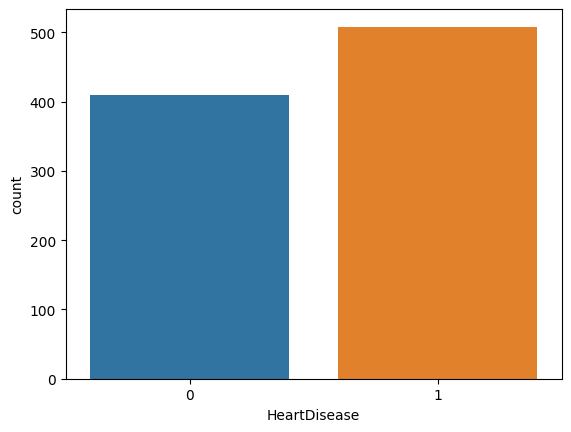

In [12]:
sns.countplot(data=df, x=TARGET_COL)

We are dealing with quite well-balanced dataset

In [19]:
model = BinaryClassifier(
    model=RandomForestClassifier(random_state=42), preprocessor=Preprocessor()
)

In [20]:
# X = model.preprocess(X)

In [21]:
param_grid = {
    "n_estimators": [1000],
    "random_state": [42],
}

In [22]:
model.fit(
    X, y, param_grid=param_grid, metrics=["f1", "accuracy", "precision", "recall"]
)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/heart-failure/.venv/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'M'


In [17]:
model.evaluate(X, y)

KeyError: "['ChestPainType'] not found in axis"

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       410
           1       0.86      0.89      0.87       508

    accuracy                           0.86       918
   macro avg       0.86      0.86      0.86       918
weighted avg       0.86      0.86      0.86       918



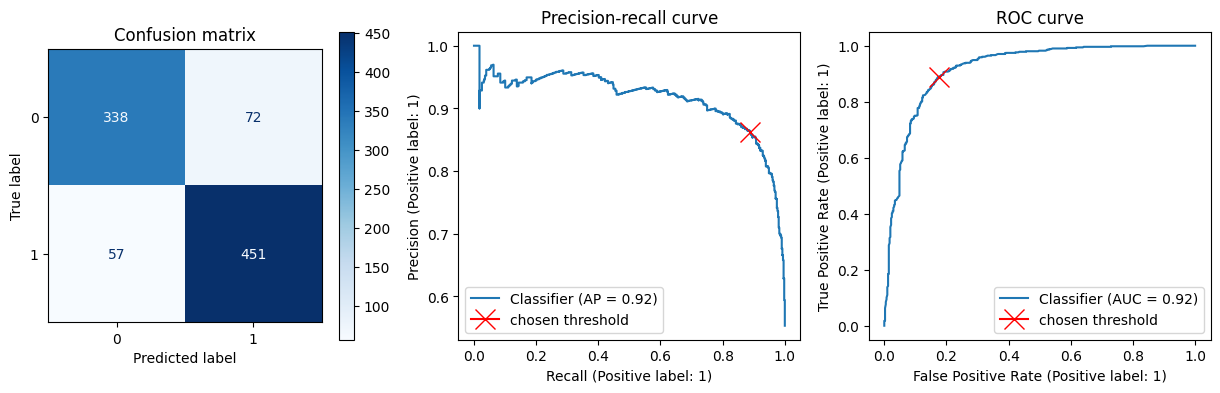

In [13]:
model.evaluate(X, y)

### Adjust cutoff point for prediction selection
`Precision = When the prediction is positive, how often is it correct?`

`Recall = How many of the true positive cases are we catching?`

In this particular use case, we might favor `Recall` over `Precision` because we want to uncover as many potential heart failures as possible. Then, the patients with positive prediction might be sent for further, more detailed investigation.

Let's adjust the cutoff threshold for predictions at a level that would ensure some decent level of `Recall` at the expense of `Precision`.

In [14]:
model.select_threshold_based_on_recall(X, y, min_recall=0.95)

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       410
           1       0.80      0.95      0.87       508

    accuracy                           0.84       918
   macro avg       0.86      0.83      0.83       918
weighted avg       0.85      0.84      0.83       918



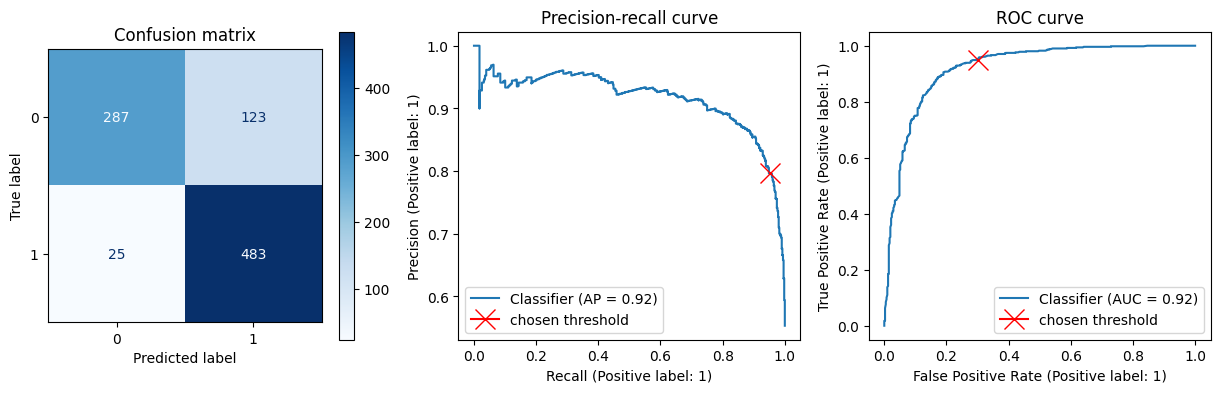

In [15]:
model.evaluate(X, y)

---

### LightGBM

---